# <center>Credit Card Fraud Detection </center>

#### From the Data: How to Split Train and Test Datasets.

This data contains transactions from two days, where the only two known features are Time (counted from the first transaction appearing in the dataset) and Amount. The target class represents if the sample is a Fraud or not and it is an imbalaced labels in there. If we count the proportion of class of transactions we will get:

<center> Non fraud transactions: <b>284315</b> <br> Fraud transactions: <b>492</b></center>

Having the proportion as

$$ \frac{Frauds}{NonFrauds} = 0.173 \% $$

#### First of our concerns is to solve the question of how to Split our train and test. From here we will have to make some assumptions and validations.

Since there is two transactions days we are not be able to get seasonality regarding with time feature. We will have to make our first assumption:

- There is no-significantly different behaviour among the two days sample of transactions. Hence, each day data presents the same patterns for each other day.

**Business problem:** The main assumption tell us that this ml-product is going to run with streaming credit-card transactions therefore it's required to have a quick-inference model and pipeline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

#LOAD DATA.
data_path=(
    '../input/',
    )

full_data = pd.read_csv(data_path[0] + 'creditcard.csv')

#DATA FILTER FROM DATA

SECONDS_PER_DAY = 60*60*24

first_day = full_data[full_data['Time'] < SECONDS_PER_DAY]
second_day = full_data.drop(first_day.index)

#SMALL EVALUATION
pct_1st_day = (first_day.Class.value_counts()[1]/first_day.Class.value_counts()[0])*100
pct_2nd_day = (second_day.Class.value_counts()[1]/second_day.Class.value_counts()[0])*100

print('Frauds proportion day one: {}\nFrauds proportion day two: {}'.format(
    pct_1st_day,pct_2nd_day))  #THE PROPORTIONS REMAIN MOSTLY IN THE SAME VALUES. THERE IS NO HUGE SHIFTING.

Frauds proportion day one: 0.19445693920625584
Frauds proportion day two: 0.15091910449896287


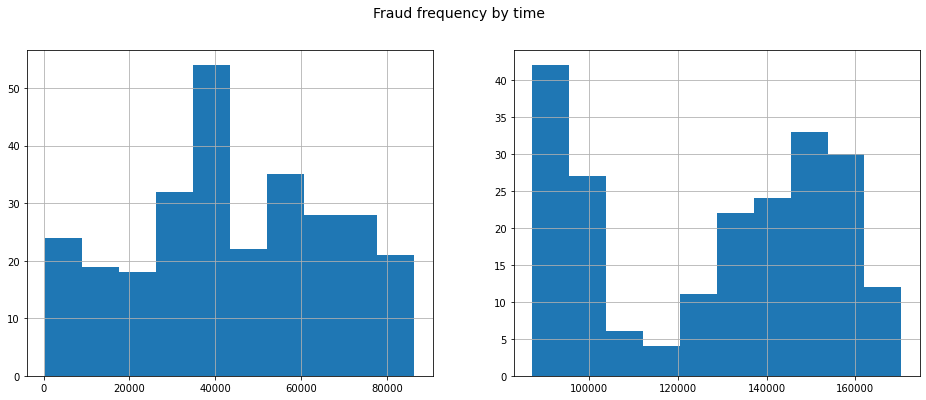

In [2]:
#There is no visible pattern between hours and frauds frequency
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Fraud frequency by time',fontsize=14)
first_day[first_day['Class'] == 1]['Time'].hist(ax=ax1)
second_day[second_day['Class'] == 1]['Time'].hist(ax=ax2)
plt.show()

#### Time transformation feature across the entire dataset.

Since Time starts from the first transaction on the dataset, is not accurate to mantain the same structure for production data. That's why we need to transform the Time feature into a cyclic data.

*Source: https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/*

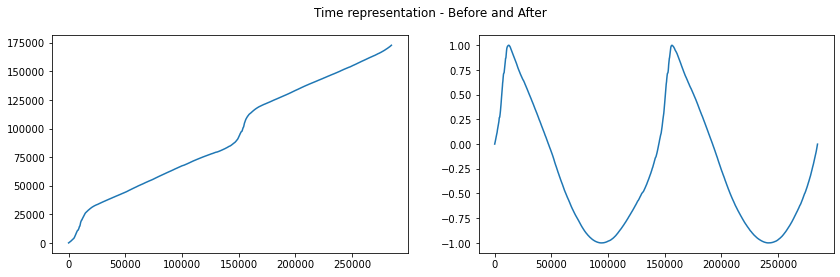

In [3]:
full_data['sin_time'] = np.sin(2*np.pi*full_data['Time']/SECONDS_PER_DAY)
full_data['cos_time'] = np.cos(2*np.pi*full_data['Time']/SECONDS_PER_DAY)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
fig.suptitle('Time representation - Before and After')
full_data['Time'].plot(ax=ax1)
full_data['sin_time'].plot(ax=ax2)
plt.show()

##### To mantain Fraud proportion across train and test datasets.

We will use a stratify train-test split approach, mantaining the proportion across the datasets and start modelling with only train-dataset. We will store this split into ``/inputs`` folder and then create the respective tests to evaluate our model.

In [4]:
SEED = 123

# Stratify train test split and write files into a csv:

X, y = full_data.drop('Class', axis=1), full_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED, stratify=y)  # 1'% test soze
 
#Writing files
pd.concat([X_train,y_train],axis=1).to_csv(data_path[0]+'train.csv', index=False)
pd.concat([X_test,y_test],axis=1).to_csv(data_path[0]+'test.csv', index=False)

**Summary:** 

- The dataset were split using Stratified method to mantain target proportions.

- The time were transformed into a cyclical feature (In production is going to be a similar function to input)

- We will model without seeing the test-dataset until the end to test performance.

- Since there are only two knowing features, EDA will not be the main focus in this approach.